# Assignment 3 Case Study

In [90]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Housing price Data

In [92]:
#Reading the data
data=pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [94]:
data = data.drop(["Address"], axis=1)


In [95]:
#Splitting the data into input data and target data
x = data.iloc[:, [0,1,2,3,4]]
y = data.iloc[:,[5]]
print(y)

             Price
0     1.059034e+06
1     1.505891e+06
2     1.058988e+06
3     1.260617e+06
4     6.309435e+05
...            ...
4995  1.060194e+06
4996  1.482618e+06
4997  1.030730e+06
4998  1.198657e+06
4999  1.298950e+06

[5000 rows x 1 columns]


In [96]:
#Splitting the dataset into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 10)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Linear Regression to  fit the model

In [97]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred = lr.predict(x_test)

In [99]:
coeff = lr.coef_
intercept = lr.intercept_
print(coeff)
print(intercept)

[[230555.55061213 163578.16953787 121128.3706456     587.56856739
  149679.72352372]]
[1234874.2888259]


Text(0.5, 1.0, 'Actual price vs Predicted price')

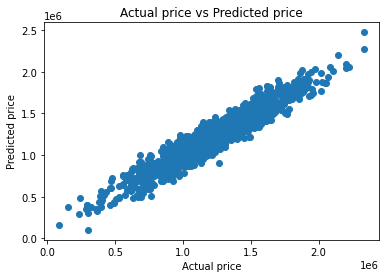

In [100]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')

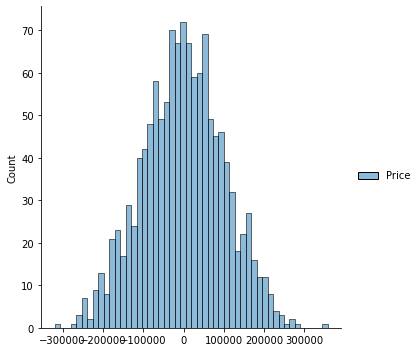

In [101]:
sns.displot((y_test - y_pred), bins = 50)

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared Error:', metrics.r2_score(y_test, y_pred))

MAE: 80713.28403260042
MSE: 10194854910.627121
RMSE 100969.57418265723
R squared Error: 0.917590524246751
